<a href="https://colab.research.google.com/github/ulfanuroktaviana575/Image-Retrieval_261_235/blob/main/Histogram_TKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from imutils.perspective import four_point_transform
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [9]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

#### hi color correction

In [10]:
def find_color_card(image):
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# detect the markers in the input image
	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)

	# try to extract the coordinates of the color correction card
	try:
		# otherwise, we've found the four ArUco markers, so we can
		# continue by flattening the ArUco IDs list
		ids = ids.flatten()

		# extract the top-left marker
		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]

		# extract the top-right marker
		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]

		# extract the bottom-right marker
		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]

		# extract the bottom-left marker
		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]

	# we could not find color correction card, so gracefully return
	except:
		return None

	# build our list of reference points and apply a perspective
	# transform to obtain a top-down, birds-eye-view of the color
	# matching card
	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)

	# return the color matching card to the calling function
	return card

In [11]:
args = {
    "reference": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001720_002.png",
    "input": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001464_000.png"
}

[INFO] loading images...


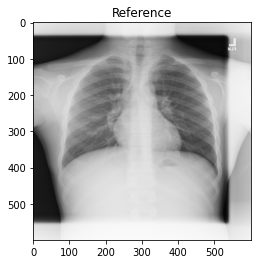

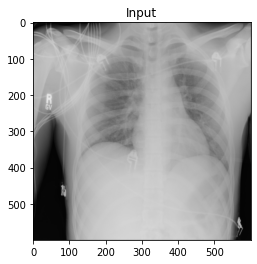

In [12]:
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [13]:
# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...
[INFO] could not find color matching card in both images


In [ ]:
# plt_imshow("Reference Color Card", refCard)
# plt_imshow("Input Color Card", imageCard)

# # apply histogram matching from the color matching card in the
# # reference image to the color matching card in the input image
# print("[INFO] matching images...")
# imageCard = exposure.match_histograms(imageCard, refCard,
# 	multichannel=True)

# # show our input color matching card after histogram matching
# plt_imshow("Input Color Card After Matching", imageCard)

#### hi detect low contrast

In [15]:
from skimage.exposure import is_low_contrast
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [16]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [17]:
args = {
    "input": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001684_008.png",
    "thresh": 0.35
}

In [18]:
imagePaths = sorted(list(list_images(args["input"])))

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the input image from disk, resize it, and convert it to
	# grayscale
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=450)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# blur the image slightly and perform edge detection
	blurred = cv2.GaussianBlur(gray, (5, 5), 0)
	edged = cv2.Canny(blurred, 30, 150)

	# initialize the text and color to indicate that the input image
	# is *not* low contrast
	text = "Low contrast: No"
	color = (0, 255, 0)

	# check to see if the image is low contrast
	if is_low_contrast(gray, fraction_threshold=args["thresh"]):
		# update the text and color
		text = "Low contrast: Yes"
		color = (0, 0, 255)

	# otherwise, the image is *not* low contrast, so we can continue
	# processing it
	else:
		# find contours in the edge map and find the largest one,
		# which we'll assume is the outline of our color correction
		# card
		cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
		cnts = imutils.grab_contours(cnts)
		c = max(cnts, key=cv2.contourArea)

		# draw the largest contour on the image
		cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

	# draw the text on the output image
	cv2.putText(image, text, (5, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
		color, 2)

	# show the output image and edge map
	plt_imshow("Image", image)
	plt_imshow("Edge", edged)

#### hi gamma correction

In [35]:
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
import argparse
import cv2

In [36]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [37]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")

	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [38]:
args = {
	"image": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001464_000.png"
}

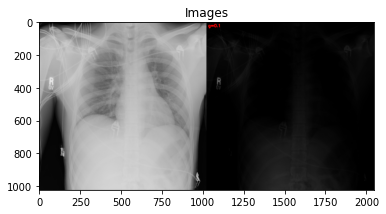

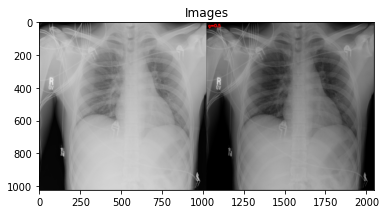

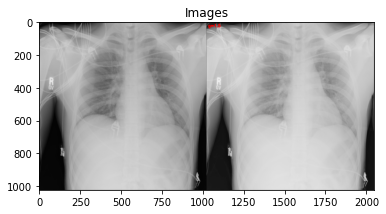

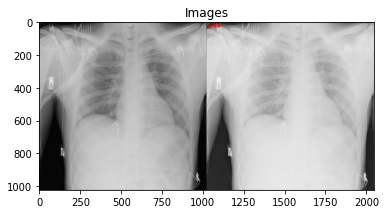

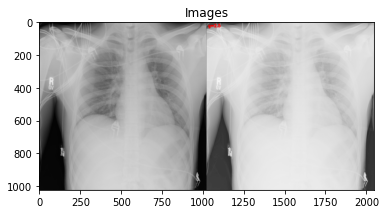

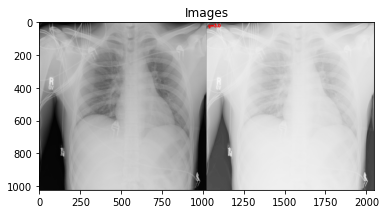

In [39]:
# load the original image
original = cv2.imread(args["image"])

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue

	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	plt_imshow("Images", np.hstack([original, adjusted]))

#### histogram

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

In [20]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [21]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")

	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

	plt.show()

In [22]:
args = {
    "image": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001684_008.png"
}

In [23]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
# compute a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

(0.0, 256.0)

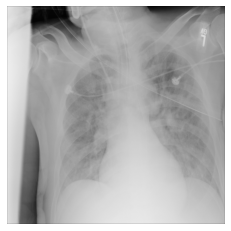

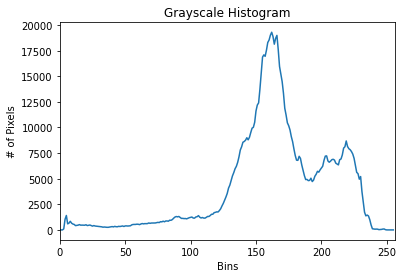

In [25]:
# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

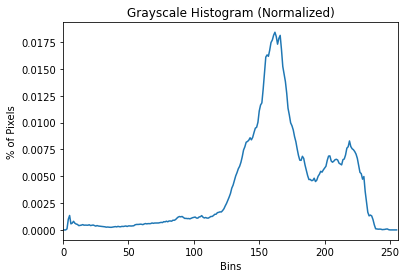

In [26]:
# normalize the histogram
hist /= hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Creating color histograms with OpenCV

In [27]:
# load the input image from disk
image = cv2.imread(args["image"])

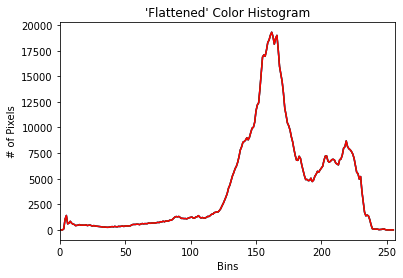

In [28]:
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


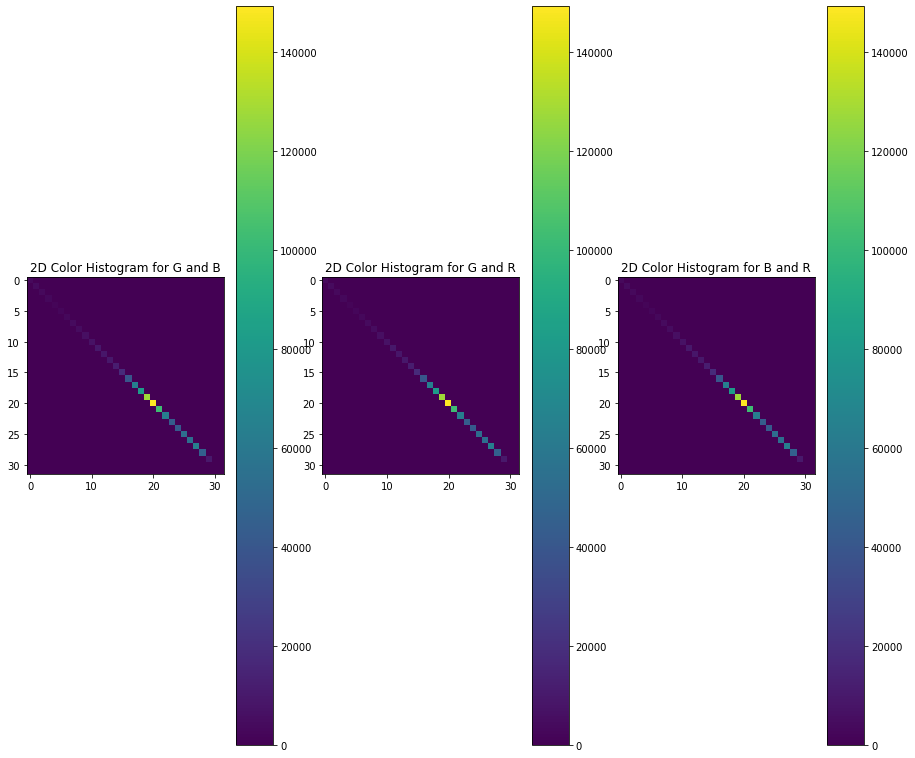

In [29]:
# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

In [30]:
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


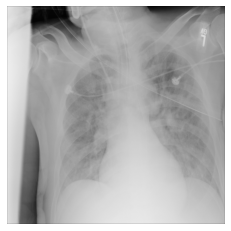

In [31]:
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

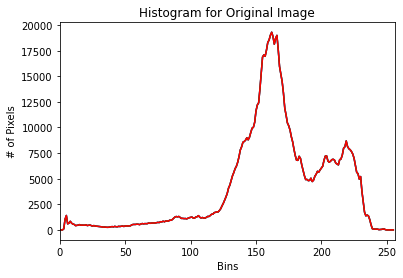

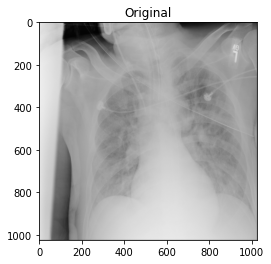

In [33]:
image = cv2.imread("/content/gdrive/MyDrive/Splitted/test/No_findings/00001684_008.png")
plot_histogram(image, "Histogram for Original Image")
plt_imshow("Original", image)

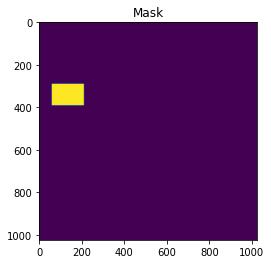

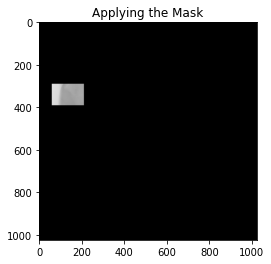

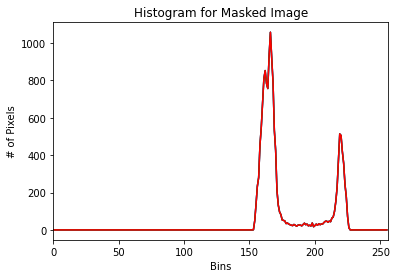

In [34]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
plt_imshow("Mask", mask)

# display the masked region
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Applying the Mask", masked)

# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)

# show our plots
plt.show()

#### hi histogram equalization

In [40]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [41]:
args = {
	"image": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001464_000.png"
}

In [42]:
# load the input image from disk and convert it to grayscale
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply histogram equalization
print("[INFO] performing histogram equalization...")
equalized = cv2.equalizeHist(gray)

[INFO] loading input image...
[INFO] performing histogram equalization...


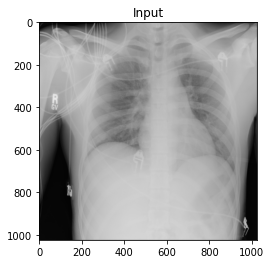

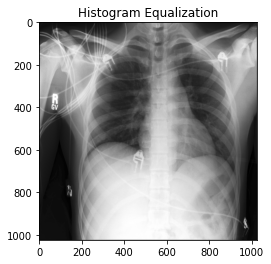

In [43]:
# show the original grayscale image and equalized image
plt_imshow("Input", gray)
plt_imshow("Histogram Equalization", equalized)

In [44]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001464_000.png",
    "clip": 2.0,
    "tile": 8
}

In [45]:
# load the input image from disk and convert it to grayscale
print("[INFO] loading input image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
print("[INFO] applying CLAHE...")
clahe = cv2.createCLAHE(clipLimit=args["clip"],
	tileGridSize=(args["tile"], args["tile"]))
equalized = clahe.apply(gray)

[INFO] loading input image...
[INFO] applying CLAHE...


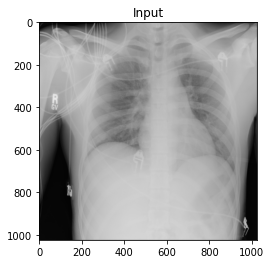

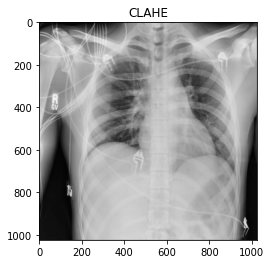

In [47]:
# show the original grayscale image and CLAHE output image
plt_imshow("Input", gray)
plt_imshow("CLAHE", equalized)

#### image processing morphology

In [48]:
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2

In [49]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [50]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "source": "/content/gdrive/MyDrive/Splitted/test/No_findings/00001573_000.png",
    "reference": "/content/gdrive/MyDrive/Splitted/test/No_findings/00002007_000.png"
}

[INFO] loading source and reference images...
[INFO] performing histogram matching...


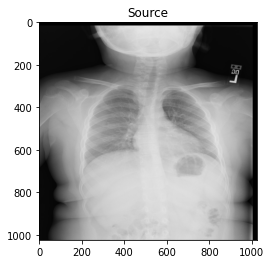

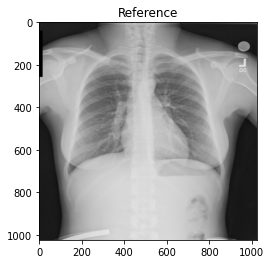

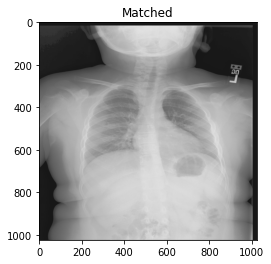

In [51]:
# load the source and reference images
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

# determine if we are performing multichannel histogram matching
# and then perform histogram matching itself
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)

# show the output images
plt_imshow("Source", src)
plt_imshow("Reference", ref)
plt_imshow("Matched", matched)

Text(0.5, 1.0, 'Matched')

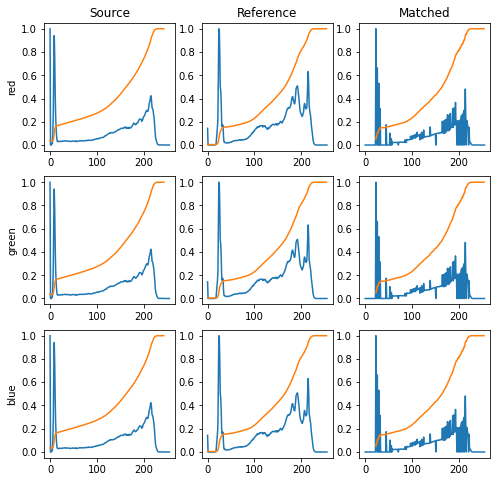

In [52]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((src, ref, matched)):
	# convert the image from BGR to RGB channel ordering
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# loop over the names of the channels in RGB order
	for (j, color) in enumerate(("red", "green", "blue")):
		# compute a histogram for the current channel and plot it
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		# compute the cumulative distribution function for the
		# current channel and plot it
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		# set the y-axis label of the current plot to be the name
		# of the current color channel
		axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")